In [112]:
import os
for dirname, _, filenames in os.walk('drive/MyDrive/datasets/age_gender.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [113]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [114]:
data = pd.read_csv('drive/MyDrive/datasets/age_gender.csv')

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [115]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 5


**Distribution**

In [116]:
## normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = data['age'].value_counts()
ethnicity_dist = data['ethnicity'].value_counts()
gender_dist = data['gender'].value_counts().rename(index={0:'Male',1:'Female'})

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()


In [117]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

In [118]:
ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')


In [119]:
ditribution_plot(x=gender_dist.index, y=gender_dist.values, name='Gender Distribution')


In [120]:
X = np.array(data['pixels'].tolist())

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



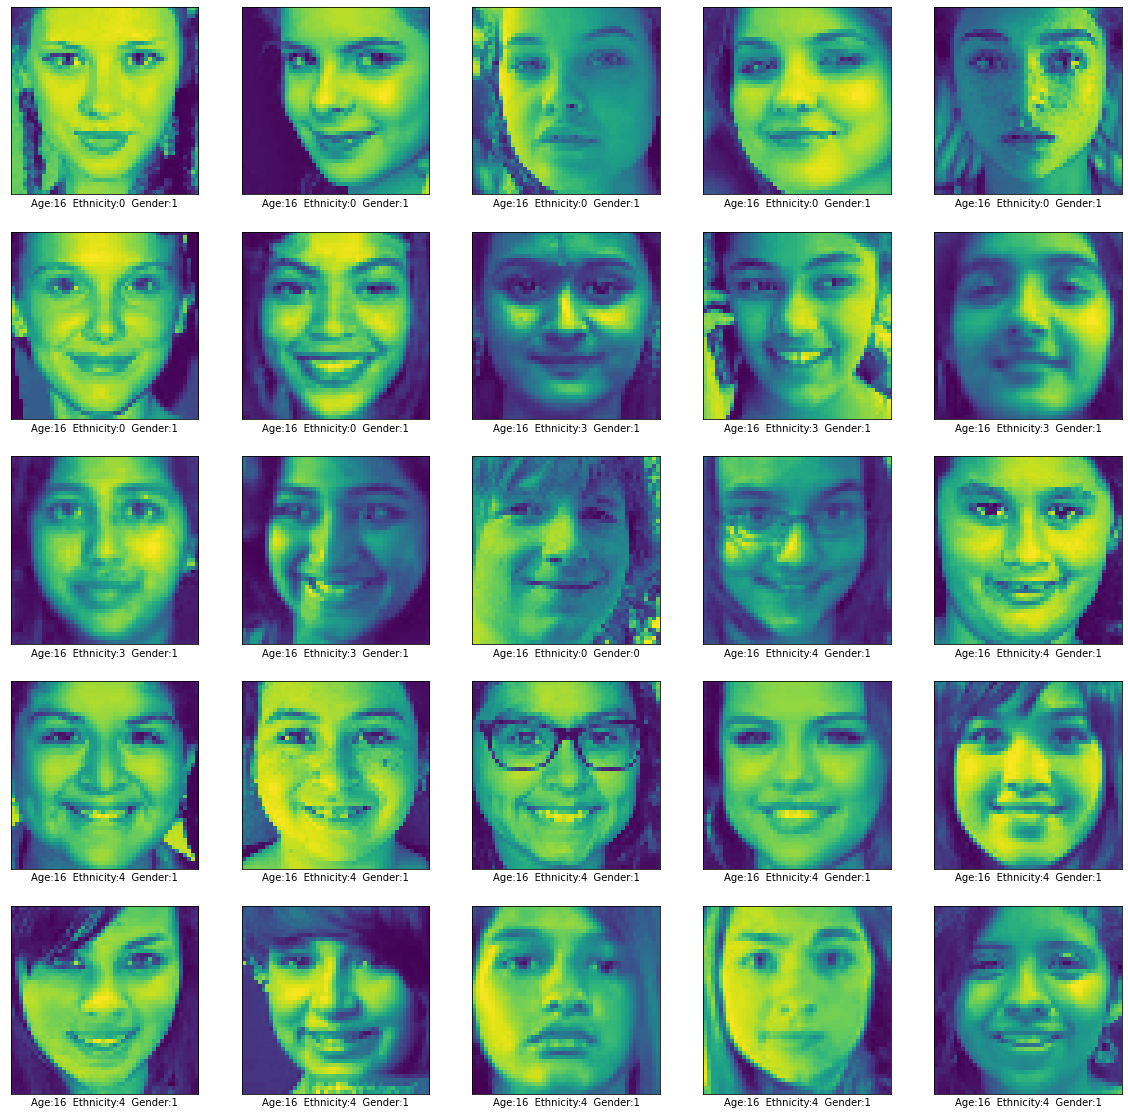

In [121]:
plt.figure(figsize=(20,20))
for i in range(2020,2050):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])+
        "  Gender:"+ str(data['gender'].iloc[i])
    )
plt.show()

**Model for Gender Prediction**


In [122]:
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [123]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)              

In [124]:
# Callbacks for gender model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
              ReduceLROnPlateau(patience=2, verbose=1)]

In [125]:
history = model.fit(
    X_train, y_train, epochs=25,  batch_size=64, callbacks=callbacks, validation_data=(X_test, y_test)
)

Epoch 1/25
297/297 [==============================] - 5s 14ms/step - loss: 0.4251 - accuracy: 0.8022 - val_loss: 0.5163 - val_accuracy: 0.8667
Epoch 2/25
297/297 [==============================] - 4s 13ms/step - loss: 0.3124 - accuracy: 0.8657 - val_loss: 0.2918 - val_accuracy: 0.8680
Epoch 3/25
297/297 [==============================] - 4s 13ms/step - loss: 0.2845 - accuracy: 0.8773 - val_loss: 0.2850 - val_accuracy: 0.8789
Epoch 4/25
297/297 [==============================] - 4s 13ms/step - loss: 0.2574 - accuracy: 0.8932 - val_loss: 0.2582 - val_accuracy: 0.8891
Epoch 5/25
297/297 [==============================] - 4s 13ms/step - loss: 0.2397 - accuracy: 0.9002 - val_loss: 0.2741 - val_accuracy: 0.8933
Epoch 6/25
297/297 [==============================] - 4s 13ms/step - loss: 0.2230 - accuracy: 0.9056 - val_loss: 0.2528 - val_accuracy: 0.8886
Epoch 7/25
297/297 [==============================] - 4s 13ms/step - loss: 0.2127 - accuracy: 0.9099 - val_loss: 0.2761 - val_accuracy: 0.8817

In [126]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Gender Model Training History')
fig.show()

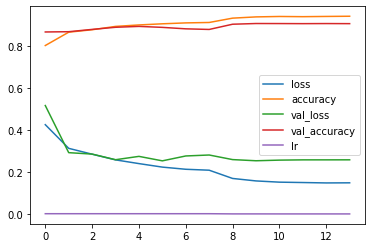

In [127]:
pd.DataFrame(history.history).plot()

In [128]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.25766870379447937
Test Accuracy: 0.9063488841056824


**Model for Ethnicity Prediction**


In [129]:
y = data['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [133]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])





model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                409664    
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)              

In [134]:
# Callbacks for ethnicity model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

In [135]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, callbacks=callbacks, validation_data=(X_test, y_test)
)

Epoch 1/25
297/297 [==============================] - 4s 12ms/step - loss: 1.2494 - accuracy: 0.5211 - val_loss: 0.9527 - val_accuracy: 0.6319
Epoch 2/25
297/297 [==============================] - 3s 11ms/step - loss: 0.9872 - accuracy: 0.6464 - val_loss: 0.8525 - val_accuracy: 0.6977
Epoch 3/25
297/297 [==============================] - 3s 11ms/step - loss: 0.9072 - accuracy: 0.6801 - val_loss: 0.7733 - val_accuracy: 0.7319
Epoch 4/25
297/297 [==============================] - 3s 11ms/step - loss: 0.8556 - accuracy: 0.7057 - val_loss: 0.7292 - val_accuracy: 0.7477
Epoch 5/25
297/297 [==============================] - 3s 11ms/step - loss: 0.8156 - accuracy: 0.7167 - val_loss: 0.7018 - val_accuracy: 0.7621
Epoch 6/25
297/297 [==============================] - 3s 11ms/step - loss: 0.7806 - accuracy: 0.7262 - val_loss: 0.6943 - val_accuracy: 0.7648
Epoch 7/25
297/297 [==============================] - 3s 11ms/step - loss: 0.7639 - accuracy: 0.7384 - val_loss: 0.6692 - val_accuracy: 0.7642

In [136]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Ethnicity Training History')
fig.show()

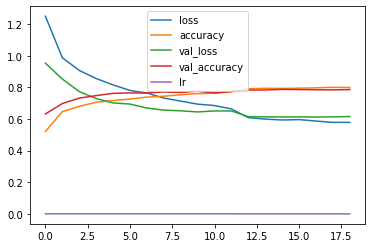

In [137]:
pd.DataFrame(history.history).plot();

In [138]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.6155486702919006
Test Accuracy: 0.7859101295471191


**Model for Age prediction**


In [139]:
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [140]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.3),
    L.Dense(1, activation='relu')
])


model.compile(optimizer='adam', loss='mse')

        

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 4, 128)       

In [141]:
# Callbacks for age model
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

In [142]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, callbacks=callbacks,validation_data=(X_test, y_test)
)

Epoch 1/25
297/297 [==============================] - 5s 16ms/step - loss: 303.4183 - val_loss: 1034.1373
Epoch 2/25
297/297 [==============================] - 4s 15ms/step - loss: 166.5960 - val_loss: 336.6011
Epoch 3/25
297/297 [==============================] - 4s 15ms/step - loss: 133.4065 - val_loss: 157.6547
Epoch 4/25
297/297 [==============================] - 4s 15ms/step - loss: 118.1655 - val_loss: 203.7517
Epoch 5/25
297/297 [==============================] - 4s 15ms/step - loss: 110.7014 - val_loss: 117.2470
Epoch 6/25
297/297 [==============================] - 4s 15ms/step - loss: 102.6737 - val_loss: 151.0392
Epoch 7/25
297/297 [==============================] - 4s 15ms/step - loss: 95.2185 - val_loss: 91.2920
Epoch 8/25
297/297 [==============================] - 4s 15ms/step - loss: 88.0563 - val_loss: 163.6534
Epoch 9/25
297/297 [==============================] - 4s 15ms/step - loss: 83.7046 - val_loss: 98.4480

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0

In [143]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Age Training History')
fig.show()


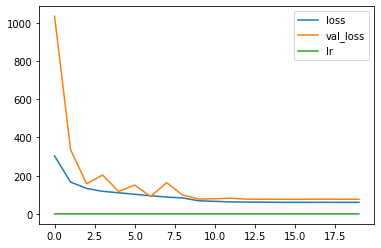

In [144]:
pd.DataFrame(history.history).plot();